# problem solving 

### 1.  pada setiap pembisnis efesiensi dari semua aspek tentu diutamakan, tanpa abai terhadap pelanyanan maksimal demi menjaga kepuasan customers. sebagai bisnismen yang bergelut dibidang rental bike berkeinginan untuk lebih efesien terhadap perawatan bike dan pengurangan karyawan. pada musim apa yang harus diterapkan penambahan dan pengurangan karyawan serta perawatan yang harus ditingkatkan?
### 2. melek terhadap peluang bisnes merupakan bagian yang terpenting dalam membaca neraca pergerakan bisnis. berdasarkan data yang ada, apa yang melatar belakangi para customers meminati bike dan temukan ketergantungan mereka terhadap bike?


#                       import packages                      

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from jcopml.plot import plot_missing_value as plot_ms_V
import seaborn as sns
from jcopml.utils import save_model

# gethering data

In [2]:
# reading file
tugasKu = pd.read_csv('day1.csv')
tugasKu.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# assessing data

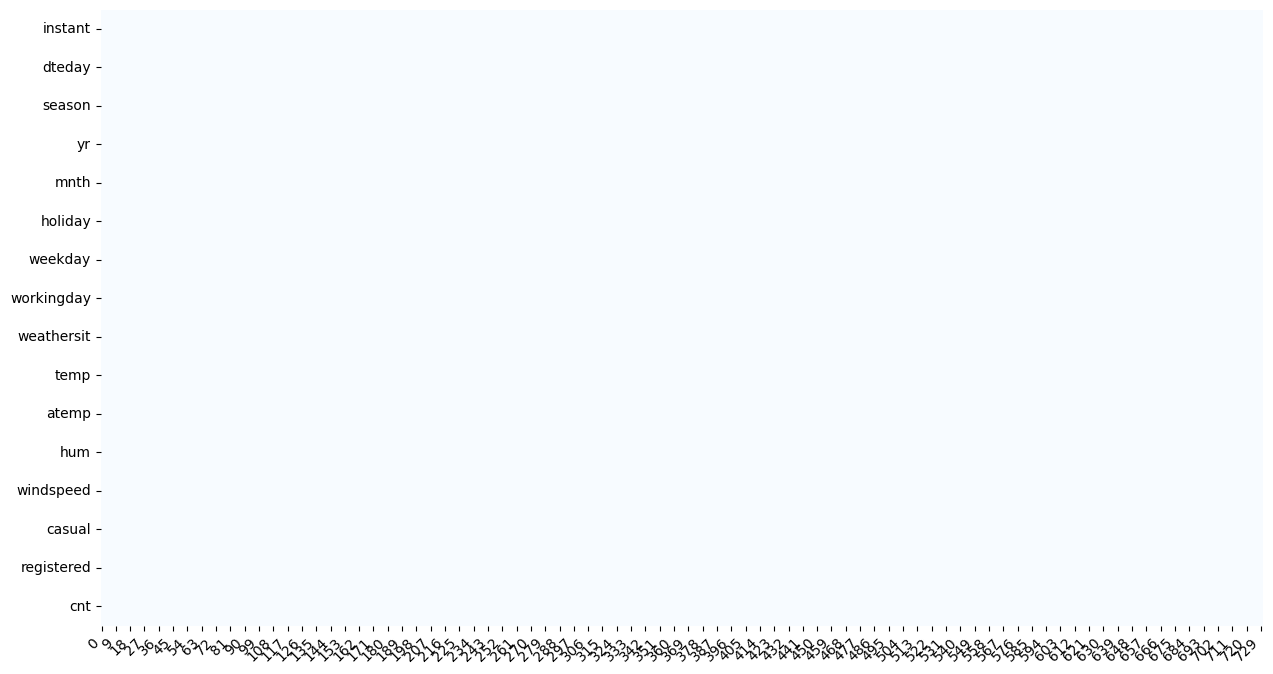

In [3]:
plot_ms_V(tugasKu)

In [4]:
tugasKu.duplicated().sum()

0

# data cleaning

In [5]:
# deletion variable not retation each other
tugasKu.drop(columns=['instant', 'dteday', 'atemp', 'holiday'], inplace=True)
# variable holiday will drop because there is same value with working day and not working


# Exploratory data analysis

In [6]:
# changing the column name to aesier reading columns
tugasKu.rename(columns= {'yr':'year','mnth':'month','weekday':'week_day','workingday':'working_day',
                        'weathersit':'weather_situation','atemp':'temp_feel','hum':'humidity','windspeed':'wind_speed',
                        'cnt':'count'},inplace=True)
# using season code from provvided data set
season_provvided = {1:'springer', 2:'summer', 3:'fall', 4:'winter'}
tugasKu['season'] = tugasKu['season'].map(season_provvided)

# weather situation with codes from provvided data set
weather_newCodes = {1:'clear', 2:'mist', 3:'light snow', 4:'heavy rain'}
tugasKu['weather_situation'] = tugasKu['weather_situation'].map(weather_newCodes)


# using the holiday with meaning not working, and than making indentity
working_or_not = {0:'holiday', 1:'working'}
tugasKu['working_day'] = tugasKu['working_day'].map(working_or_not)

# adding month names at variable month
month_names = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September',
              10:'October', 11:'November', 12:'Desember'}
tugasKu['month']= tugasKu['month'].map(month_names)
years = {0:'2011', 1:'2012'}
tugasKu['year']= tugasKu['year'].map(years)
tugasKu.head()

,season,year,month,week_day,working_day,weather_situation,temp,humidity,wind_speed,casual,registered,count
0,springer,2011,January,6,holiday,mist,0.344167,0.805833,0.160446,331,654,985
1,springer,2011,January,0,holiday,mist,0.363478,0.696087,0.248539,131,670,801
2,springer,2011,January,1,working,clear,0.196364,0.437273,0.248309,120,1229,1349
3,springer,2011,January,2,working,clear,0.200000,0.590435,0.160296,108,1454,1562
4,springer,2011,January,3,working,clear,0.226957,0.436957,0.186900,82,1518,1600


In [7]:
ya = tugasKu['count']
print(ya)

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: count, Length: 731, dtype: int64


In [8]:

def total(ya):
    z=0;
    x = ya
    jml = len(x)

    for i in range(jml):
        y = x[i]
        z+=y
    return z

In [9]:
jumlah_total = total(ya)
print(jumlah_total)

3292679


In [10]:
tugasKu.to_csv('semoga.csv', index=False)

In [11]:
tugasKu.month.value_counts()

month
January      62
March        62
May          62
July         62
August       62
October      62
Desember     62
April        60
June         60
September    60
November     60
February     57
Name: count, dtype: int64

In [12]:
tugasKu.season.value_counts()

season
fall        188
summer      184
springer    181
winter      178
Name: count, dtype: int64

# Visualization and Explanatory Analysis

In [13]:
# dropping columns weekday because lower corelation
tugasKu.drop(columns=['week_day'], inplace=True)

In [14]:
#corelation
cor = tugasKu[['temp','humidity', 'casual', 'wind_speed']].corr()
oke = np.array(cor)
oke[np.tril_indices_from(oke)]=False
plt.show()

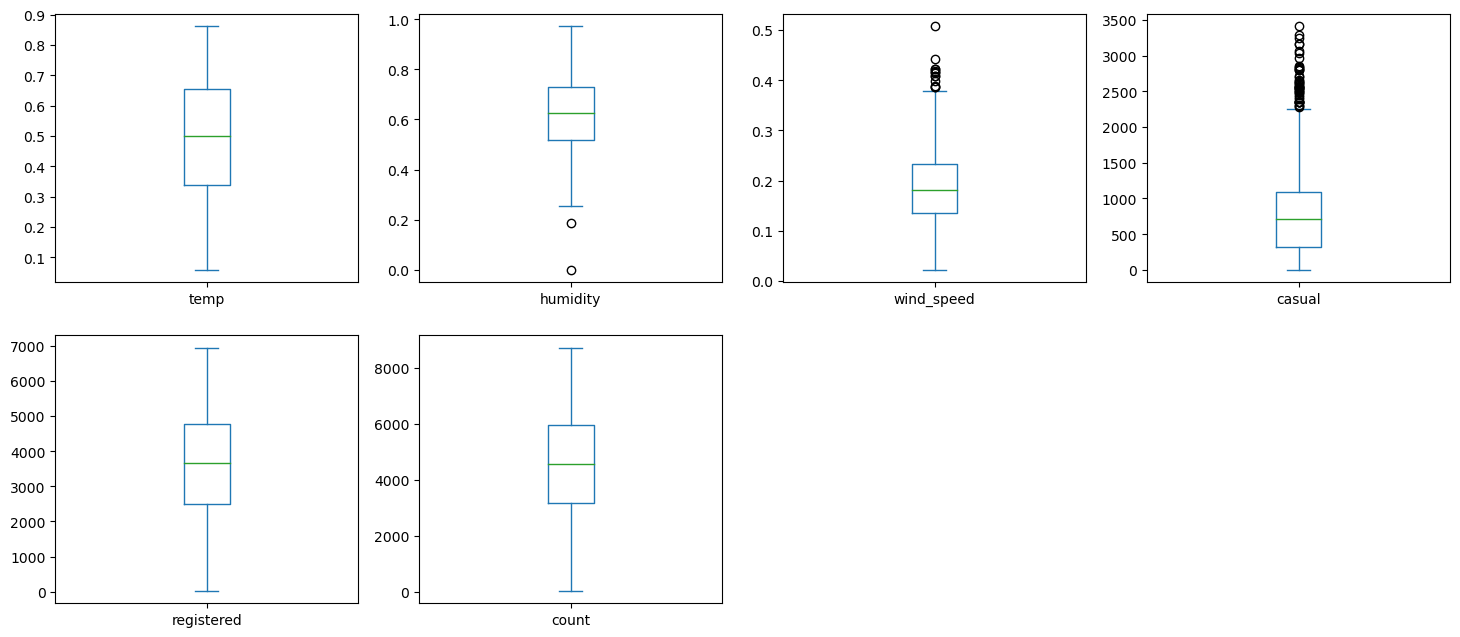

In [15]:
plt.rcParams['figure.figsize'] = [18,16];
tugasKu.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey= False);

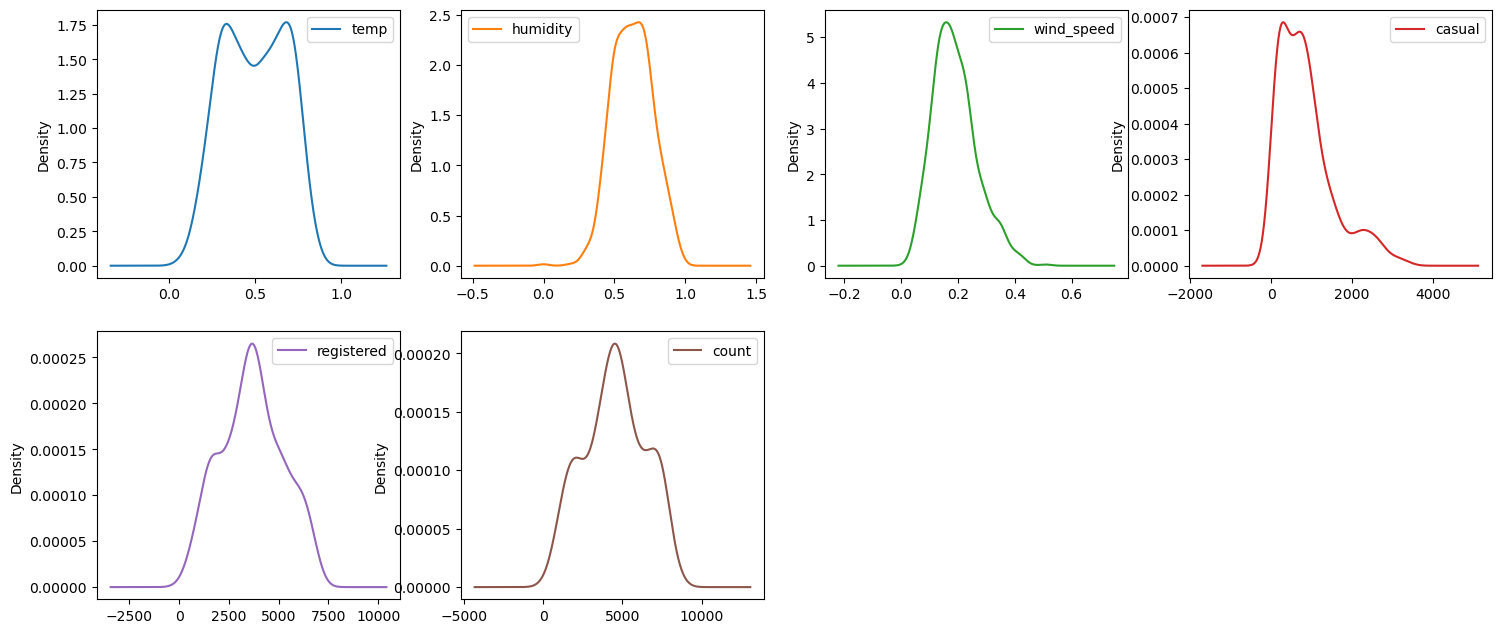

In [16]:
plt.rcParams['figure.figsize'] = [18,16];
tugasKu.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey= False);

D:\conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


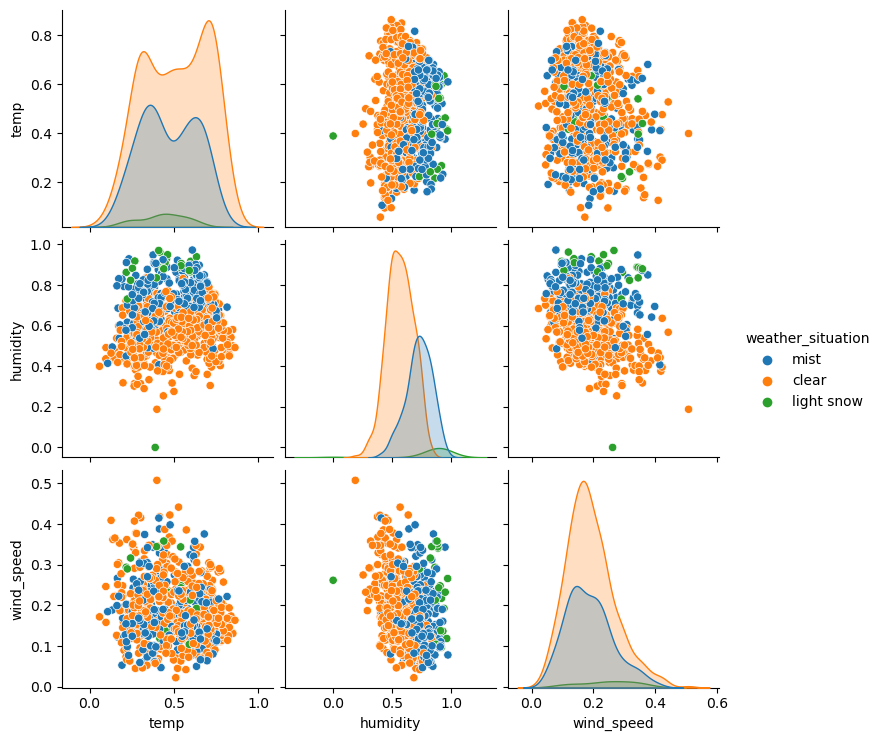

In [17]:
sns.pairplot(tugasKu, hue='weather_situation', vars = ['temp', 'humidity','wind_speed'])

D:\conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


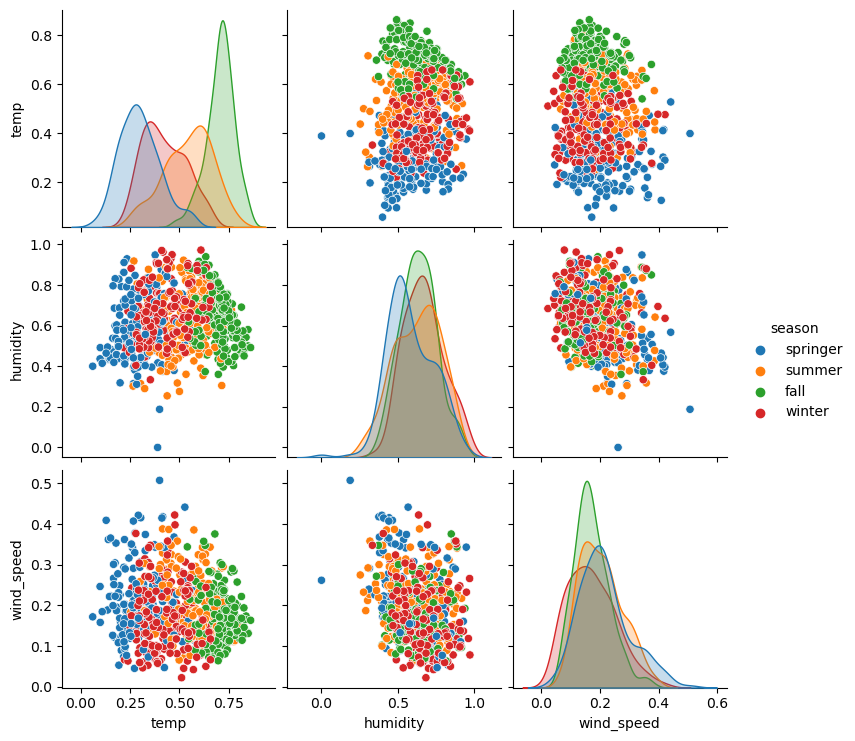

In [18]:
sns.pairplot(tugasKu, hue='season', vars = ['temp', 'humidity','wind_speed']);

In [19]:
tugasKu.pivot_table(index='season', columns='weather_situation', values='registered', aggfunc='sum')

weather_situation,clear,light snow,mist
season,,,
fall,631498,9268,194272
springer,270474,3458,136794
summer,480598,3087,231382
winter,429036,18161,264634


In [20]:
tugasKu.working_day.value_counts()

working_day
working    500
holiday    231
Name: count, dtype: int64

D:\conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


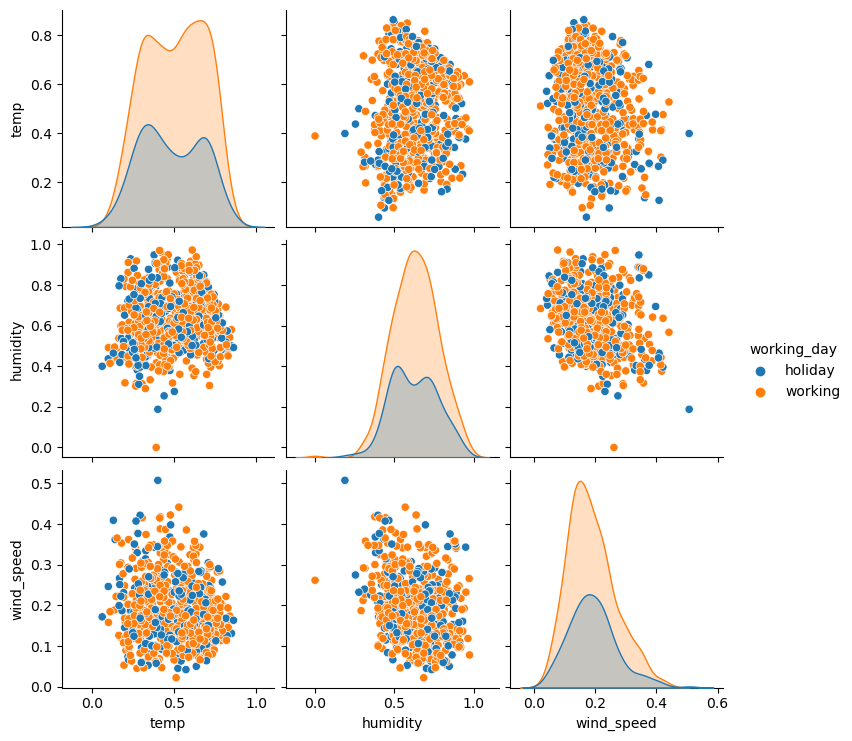

In [21]:
sns.pairplot(tugasKu, hue='working_day', vars = ['temp', 'humidity','wind_speed'])

### more insights

* terdapat outliner pada data humidity dan wind_speed
* berdasarkan fakta data yang ada, bikers lebih dominan di suhu rata2 bukan pada extrim temp, berkisar dari minimum 0,4 hinga maximum 0.65
* dari data tahunan dapat disimpulkan bahwa para bikers lebih mendominasi pada kegiatan kerja dan sedikit pada hari libur.

### clustering data by years

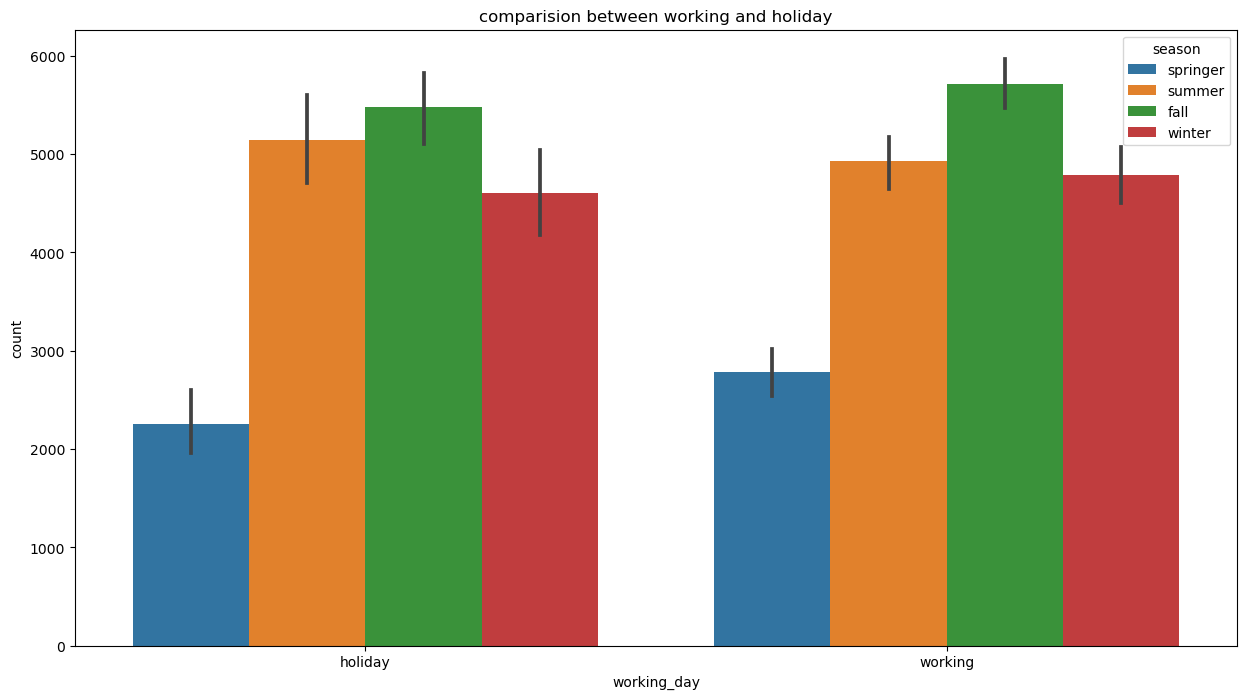

In [22]:
fig,ax=plt.subplots(figsize= (15,8))
sns.barplot(data=tugasKu, x='working_day', y='count', hue='season');
ax.set_title('comparision between working and holiday');

### clustering data by season

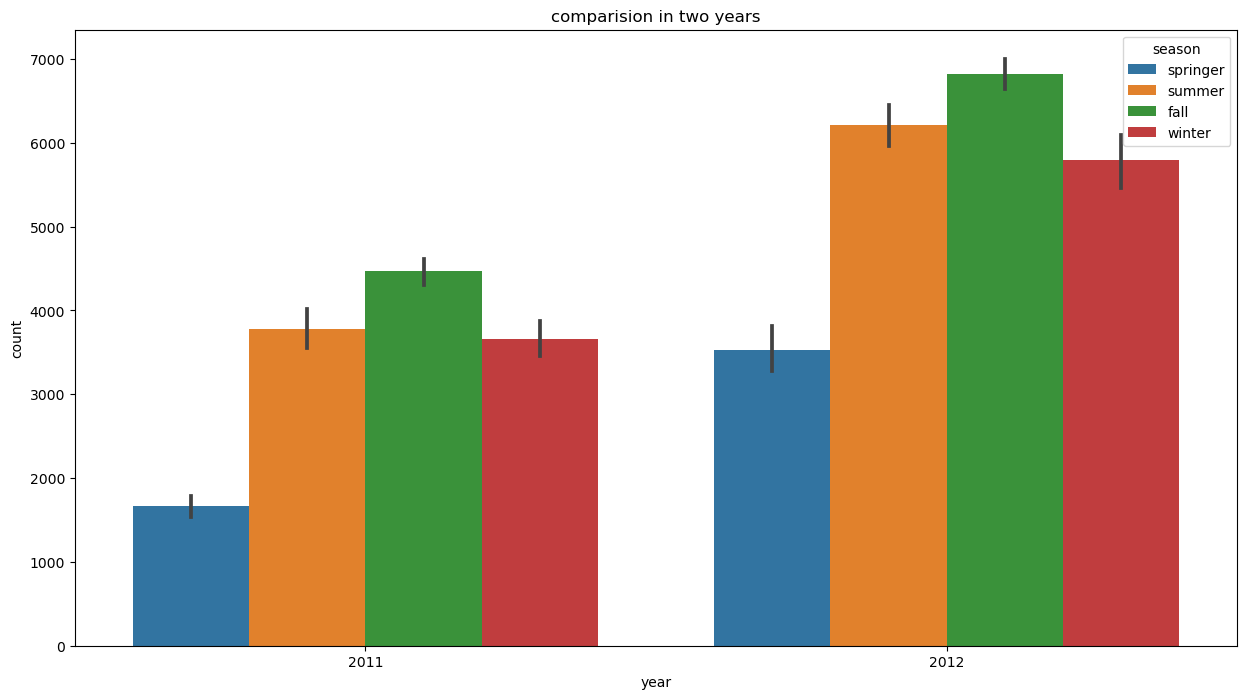

In [23]:
fig,ax=plt.subplots(figsize= (15,8))
sns.barplot(data=tugasKu, x='year', y='count', hue='season');
ax.set_title('comparision in two years');

## Question 1

#### pada musim apa yang harus diterapkan penambahan dan pengurangan karyawan serta perawatan yang harus ditingkatkan?

## Question 2

#### apa yang melatar belakangi para customers meminati bike dan temukan ketergantungan mereka terhadap bike?

## the Conclution of Questions

In [24]:
"""
counclution masalah nomer 1 -->
berdasarkan dari hasil survie data dari tahap analisa hingga tahap spisualisasi. dapat memberikan jawaban terhadap permintaan
bisnes tersebut. metode penerawangan data dengan strategi analisis dapat memberikan gambaran secara gelobal terhadap pola bisnis
kedepannya ditentukan oleh dua faktor utama keadaan musim dan cuaca. dari empat musim yang dilalui dapat disimpulkan bahwa 
musim gugur dengan temperatur dan keadaan alam cerah dapat menjadi loncatan besar terhadap pelaku bisnis rental, bahkan jika 
melihat kepada perubahan dari tahun ketahun yang semakin meningkat. maka dari itu penambahan karyawan dapat di lakukan pada
musim gugur dari bulan june hingga pertengahan september. tentu tampa mengabaikan cuaca dan suhu peralihan musim dari gugur
ke musim panas,  musim panas masih menjadi peringkat kedua dari para customers. 
artinya dapat dipertimbangkan kembali untuk penambahan dan pengurangan karyawan.
"""



"""
counclution masalah nomer 2 -->

data permusim menunjukkan bahwa customers meminati bike semakin meningkat hal itu terbukti di tahun 2012 mengalami kenaikan
yang siknifikan. di tambah lagi dari data working dan holiday para penggemar bike tidak mengalami penurunan.
ini membuktikan bahwa menaiki bike menjadikan hidup mereka semakin sehat karena kerja sambil olah raga, dan aktifitas lainya
juga ditempuh menggunakan bike. sehingga tertanam di dalam diri mereka bike membuat sehat. inilah salah satu faktor kenapa para
penggemar memiliki bike sebagai alternatifnya. hingga mereka memiliki ketergantungan yang cukup besar terhadap bike hal itu
ditunjukan data secara umum bahwa berangkat kerja ditempuh dengan bike karena data working menggunakan bike meningkat dari pada
holiday

"""

'\ncounclution masalah nomer 2 -->\n\ndata permusim menunjukkan bahwa customers meminati bike semakin meningkat hal itu terbukti di tahun 2012 mengalami kenaikan\nyang siknifikan. di tambah lagi dari data working dan holiday para penggemar bike tidak mengalami penurunan.\nini membuktikan bahwa menaiki bike menjadikan hidup mereka semakin sehat karena kerja sambil olah raga, dan aktifitas lainya\njuga ditempuh menggunakan bike. sehingga tertanam di dalam diri mereka bike membuat sehat. inilah salah satu faktor kenapa para\npenggemar memiliki bike sebagai alternatifnya. hingga mereka memiliki ketergantungan yang cukup besar terhadap bike hal itu\nditunjukan data secara umum bahwa berangkat kerja ditempuh dengan bike karena data working menggunakan bike meningkat dari pada\nholiday\n\n'